## Comprehensive Water Quality Assessment and Potability Prediction using Multi-parameter Analysis"

Objective: The objective of this machine learning problem is to predict whether a given set of water quality parameters meets the potability criteria or not based on the provided features.

### pH - 
Represents the pH level of the water.
Unit: pH (dimensionless)

### Hardness - 
Indicates the concentration of minerals, primarily calcium and magnesium, in the water.
Unit: mg/L (milligrams per liter)

### Solids - 
Refers to the total dissolved solids in the water, which includes minerals, salts, and organic matter.
Unit: ppm (parts per million)

### Chloramines - 
Represents the concentration of chloramines, which are disinfection byproducts formed when chlorine is used for water treatment.
Unit: ppm (parts per million)

### Sulfate - 
Indicates the concentration of sulfate ions in the water.
Unit: mg/L (milligrams per liter)

### Conductivity - 
Reflects the water's ability to conduct an electrical current, which is influenced by dissolved ions.
Unit: µS/cm (micro Siemens per centimeter)

### Organic carbon - 
Indicates the concentration of organic carbon compounds in the water.
Unit: ppm (parts per million)

### Trihalomethanes - 
Represents the concentration of trihalomethanes, which are disinfection byproducts formed during water treatment.
Unit: µg/L (micrograms per liter)

### Turbidity - 
Refers to the cloudiness or haziness of a fluid caused by large numbers of individual particles.
Unit: NTU (Nephelometric Turbidity Units)

### Potability (Target Variable) - 
Indicates whether the water is considered safe for drinking or not.
Values: 0 (Not Potable), 1 (Potable)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df = pd.read_csv("water_potability.csv", encoding='latin1')

In [3]:
df.shape

(3276, 10)

In [4]:
df.head()

ph     Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.8904555  20791.31898  7.300211873  368.516441   
1  3.716080075  129.4229205  18630.05786  6.635245884         NaN   
2  8.099124189  224.2362594  19909.54173  9.275883603         NaN   
3  8.316765884  214.3733941  22018.41744  8.059332377  356.886136   
4  9.092223456  181.1015092  17978.98634  6.546599974  310.135738   

  Conductivity Organic_carbon Trihalomethanes    Turbidity  Potability  
0  564.3086542    10.37978308     86.99097046  2.963135381           0  
1  592.8853591    15.18001312     56.32907628  4.500656275           0  
2  418.6062131    16.86863693     66.42009251   3.05593375           0  
3  363.2665162     18.4365245     100.3416744  4.628770537           0  
4  398.4108134    11.55827944     31.99799273  4.075075425           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [6]:
columns_to_convert = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [7]:
# Convert object columns to float (handling errors with errors='coerce')
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# The 'errors' parameter set to 'coerce' will replace non-numeric values with NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3274 non-null   float64
 2   Solids           3265 non-null   float64
 3   Chloramines      3274 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3274 non-null   float64
 6   Organic_carbon   3213 non-null   float64
 7   Trihalomethanes  3113 non-null   float64
 8   Turbidity        3274 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [10]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='magma')

There are outliers in the data. We can delete no more than 1-2% of the data, i.e. 30-60 rows. From the above table, we can see that the count of each feature are not same. so there must me some null values. Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high. However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [11]:
##Portability is 1 - means good for Human

df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [12]:
# Portability is 0 - means not good for Human

df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

In [13]:
df.nunique()

ph                 2784
Hardness           3274
Solids             3265
Chloramines        3274
Sulfate            2495
Conductivity       3274
Organic_carbon     3213
Trihalomethanes    3113
Turbidity          3274
Potability            2
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

ph                 492
Hardness             2
Solids              11
Chloramines          2
Sulfate            781
Conductivity         2
Organic_carbon      63
Trihalomethanes    163
Turbidity            2
Potability           0
dtype: int64

1) pH has a relatively high count of null values, with 492 missing entries. This could significantly impact the analysis
2) Sulfate stands out with a substantial 781 missing values, underscoring the importance of addressing these gaps for a comprehensive understanding of water quality. 
3) Trihalomethanes also show a notable number of missing values (163), emphasizing the need for careful consideration during analysis.

## Handling Missing value

In [16]:
from sklearn.impute import KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors= 10, weights= "uniform")

In [18]:
l = imputer.fit_transform(df)

In [19]:
l

array([[7.46251261e+00, 2.04890456e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608007e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [20]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [21]:
df1 = pd.DataFrame(l, columns = df.columns)

In [22]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

KNN imputation, 'Sulfate', 'ph', o'rganic carbon' and 'Trihalomethanes' show zero missing values. Minimal missing data in other features may also be treated with KNN imputation. 

In [23]:
df

ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Hypothesis Testing

### Shapiro-Wilk test

In [24]:
l = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i in (l):
    variable = i  

    # sample data for the variable and handle missing values
    sample_data = df1[variable]

    # Shapiro-Wilk test
    statistic, p_value = shapiro(sample_data)

    # results
    print(f'Shapiro-Wilk test statistic: {statistic}')
    print(f'p-value: {p_value}')

    # Check the significance level
    alpha = 0.05
    if p_value > alpha:
        print(f"The data for '{variable}' appears to be normally distributed (fail to reject the null hypothesis)")
    else:
        print(f"The data for '{variable}' does not appear to be normally distributed (reject the null hypothesis)")
        
    print("--------------------------------------------------------------------------------------------------------")

Shapiro-Wilk test statistic: 0.9882787466049194
p-value: 7.966461335956942e-16
The data for 'ph' does not appear to be normally distributed (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Shapiro-Wilk test statistic: 0.9959705471992493
p-value: 9.656044142047904e-08
The data for 'Hardness' does not appear to be normally distributed (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Shapiro-Wilk test statistic: 0.9776966571807861
p-value: 2.856239155606539e-22
The data for 'Solids' does not appear to be normally distributed (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Shapiro-Wilk test statistic: 0.005616605281829834
p-value: 0.0
The data for 'Chloramines' does not appear to be normally distributed (reject the null hypothesis)
------

Since most of the features are not distributed according to the normal distribution law, we will use the Mann-Whitney Y-test.

### Mann-Whitney U test

In [25]:
potable = df1[df["Potability"] == 1]
not_potable = df1[df["Potability"] == 0]

l = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i in (l):
    variable = i  

    # sample data for the variable and handle missing values
    
    sample_data = df1[variable]
    
    u_stat, mw_p_value = mannwhitneyu(potable[variable], not_potable[variable])
    print(f"Mann-Whitney U test p-value: {mw_p_value}")
    
    alpha = 0.05

    if mw_p_value > alpha:
        print(f"The data for '{variable}' are no significant differences (fail to reject the null hypothesis)")
    else:
        print(f"The data for '{variable}' sample distributions are not equal (reject the null hypothesis)")
          
    print("-----------------------------------------------------------------------------------------------------")

Mann-Whitney U test p-value: 0.6232383478390888
The data for 'ph' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.7997904325926704
The data for 'Hardness' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.44547510018848235
The data for 'Solids' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.08555251809424642
The data for 'Chloramines' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.4059

the data suggests that the mentioned water quality variables do not exhibit significant variations between potable and non-potable water sources based on the Mann-Whitney U tests.

In [26]:
# Univarient Analysis

## PH

In [27]:
df["ph"].describe()

count    2784.000000
mean        7.080766
std         1.594605
min         0.000000
25%         6.092665
50%         7.035894
75%         8.062251
max        14.000000
Name: ph, dtype: float64

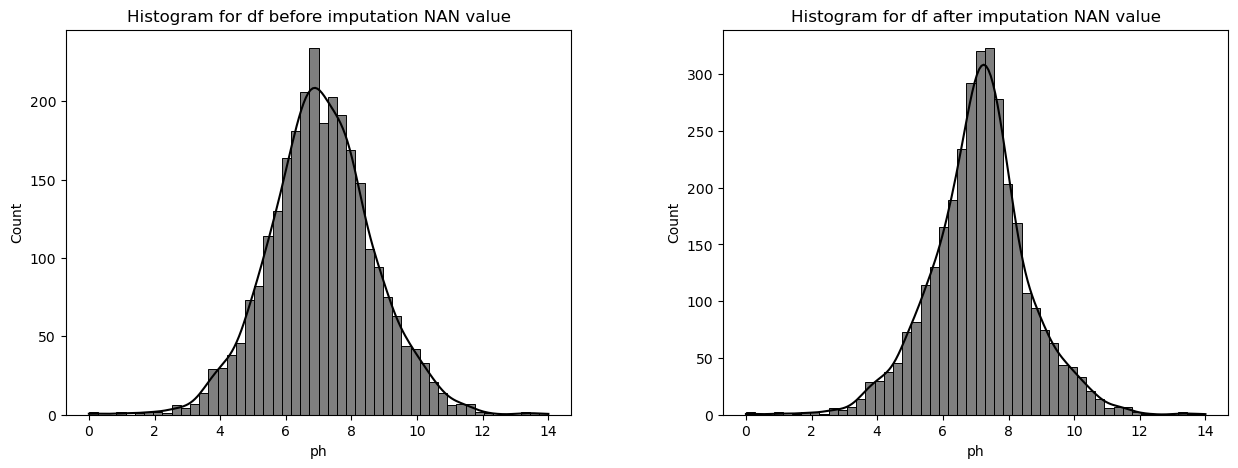

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.histplot(df['ph'], bins=50, kde=True, color='black', ax=axes[0])
axes[0].set_title('Histogram for df before imputation NAN value')

# Plot for df2
sns.histplot(df1['ph'], bins=50, kde=True, color='black', ax=axes[1])
axes[1].set_title('Histogram for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

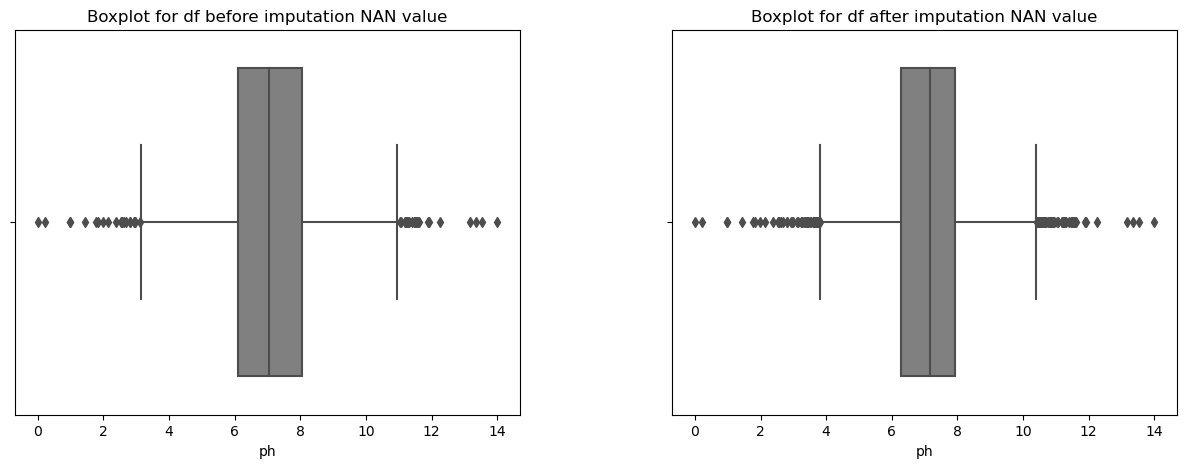

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.boxplot(x = df["ph"], color = "gray", ax = axes[0])
axes[0].set_title('Boxplot for df before imputation NAN value')

# Plot for df2
sns.boxplot(x = df1["ph"], color = "gray", ax = axes[1])
axes[1].set_title('Boxplot for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

In [30]:
potable = df1[df["Potability"] == 1]
not_potable = df1[df["Potability"] == 0]

u_stat, mw_p_value = mannwhitneyu(potable['ph'], not_potable['ph'])
print(f"Mann-Whitney U test p-value: {mw_p_value}")

Mann-Whitney U test p-value: 0.6232383478390888


In [31]:
df["ph"].isnull().sum()

492

pH: Exhibits a fairly symmetric distribution with a small number of outliers.
ph has 492 null values present in the column

## Hardness

In [32]:
df["Hardness"].describe()

count    3274.000000
mean      196.359915
std        32.887464
min        47.432000
25%       176.844221
50%       196.928061
75%       216.671731
max       323.124000
Name: Hardness, dtype: float64

<Axes: xlabel='Hardness', ylabel='Count'>

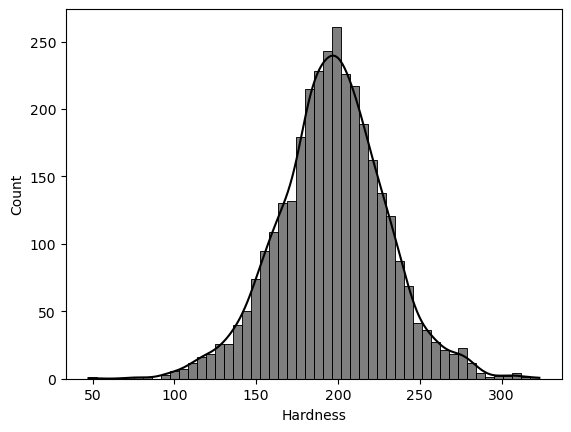

In [33]:
sns.histplot(df1["Hardness"], bins = 50, color = "black", kde = True)

<Axes: xlabel='Hardness'>

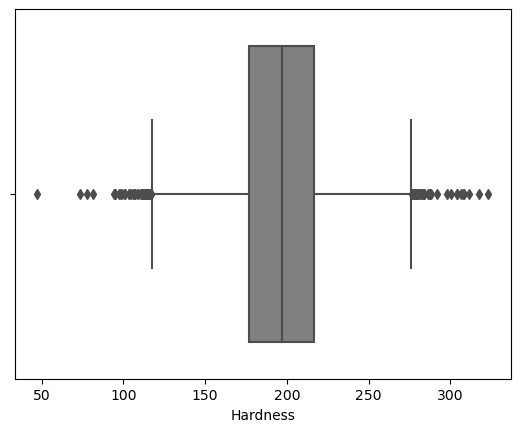

In [34]:
sns.boxplot(x = df1["Hardness"], color = "gray")

In [35]:
u_stat, mw_p_value = mannwhitneyu(potable['Hardness'], not_potable['Hardness'])
print(f"Mann-Whitney U test p-value: {mw_p_value}")

Mann-Whitney U test p-value: 0.7997904325926704


In [36]:
df["Hardness"].isnull().sum()

2

In [37]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Hardness: Shows a roughly normal distribution with outliers on both ends.

## Solids

<Axes: xlabel='Solids', ylabel='Count'>

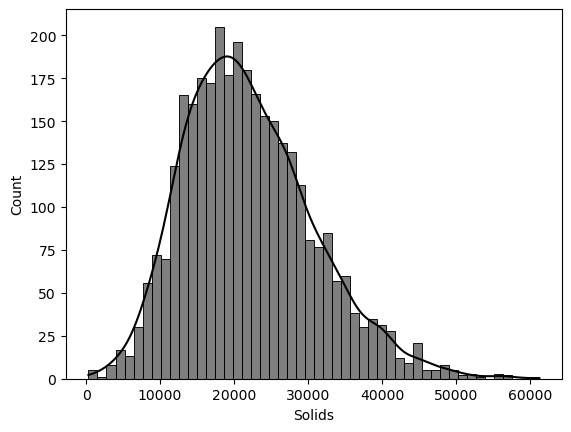

In [38]:
sns.histplot(df1["Solids"], color = "black", kde = True, bins = 50)

<Axes: xlabel='Solids'>

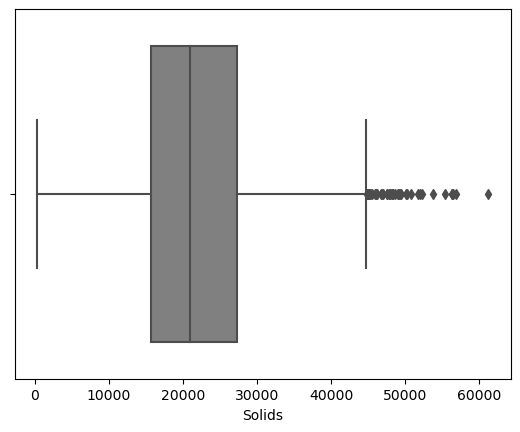

In [39]:
sns.boxplot(x = df1["Solids"], color = "gray")

In [40]:
u_stat, mw_p_value = mannwhitneyu(potable["Solids"], not_potable['Solids'])
print(f"Mann-Whitney U test p-value: {mw_p_value}")

Mann-Whitney U test p-value: 0.44547510018848235


In [41]:
df["Solids"].isnull().sum()

11

Solids: Presents a right-skewed distribution, suggesting higher values are more spread out.

## Chloramines

<Axes: xlabel='Chloramines', ylabel='Count'>

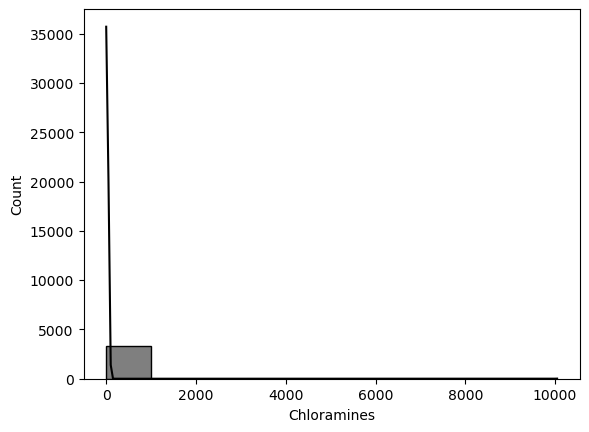

In [42]:
sns.histplot(df1["Chloramines"], kde = True, color = 'black', bins = 10)

<Axes: xlabel='Chloramines'>

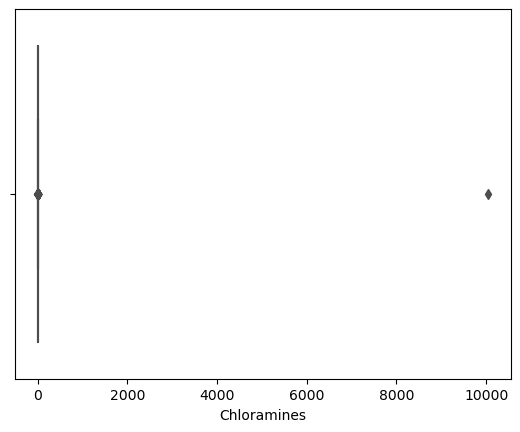

In [43]:
sns.boxplot(x = df1["Chloramines"], color = "gray")

In [44]:
u_stat, mw_p_value = mannwhitneyu(potable["Chloramines"], not_potable["Chloramines"])
print(f"Mann-Whitney U test p-value: {mw_p_value}")

Mann-Whitney U test p-value: 0.08555251809424642


In [45]:
df["Chloramines"].isnull().sum()

2

Chloramines: No box is visible, indicating potential issues with extreme values that may require data transformation.

## Sulfate

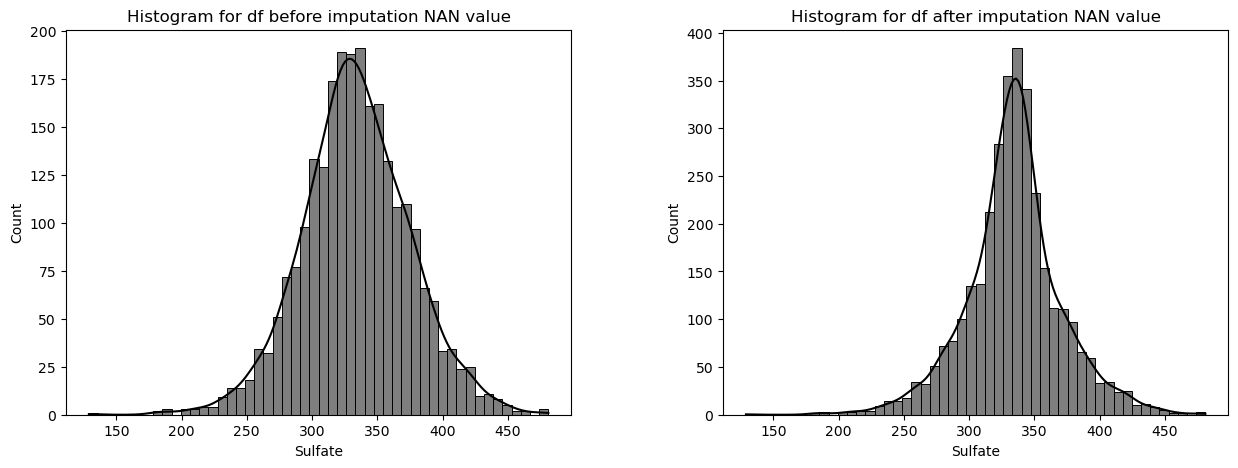

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.histplot(df['Sulfate'], bins=50, kde=True, color='black', ax=axes[0])
axes[0].set_title('Histogram for df before imputation NAN value')

# Plot for df2
sns.histplot(df1['Sulfate'], bins=50, kde=True, color='black', ax=axes[1])
axes[1].set_title('Histogram for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

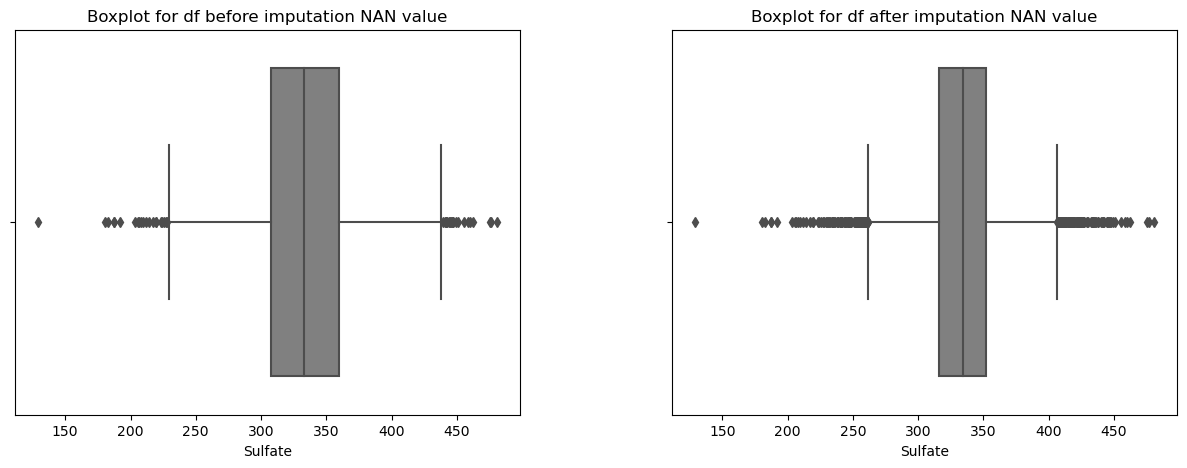

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.boxplot(x = df["Sulfate"], color = "gray", ax = axes[0])
axes[0].set_title('Boxplot for df before imputation NAN value')

# Plot for df2
sns.boxplot(x = df1["Sulfate"], color = "gray", ax = axes[1])
axes[1].set_title('Boxplot for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

In [48]:
df["Sulfate"].isnull().sum()

781

Sulfate: The distribution looks approximately normal with some outliers.

## Conductivity

In [49]:
df["Conductivity"].isnull().sum()

2

<Axes: xlabel='Conductivity', ylabel='Count'>

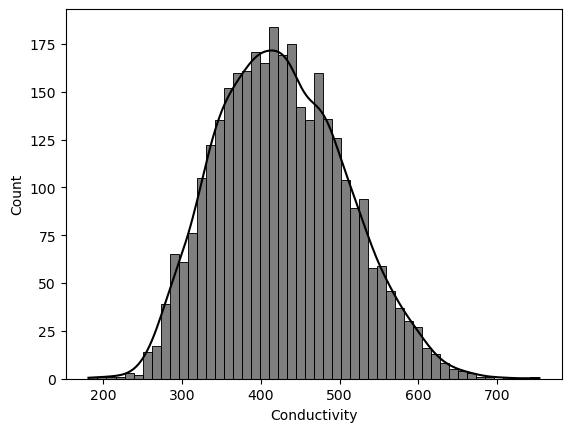

In [50]:
sns.histplot(df1["Conductivity"], color = "black", bins = 50, kde = True)

<Axes: xlabel='Conductivity'>

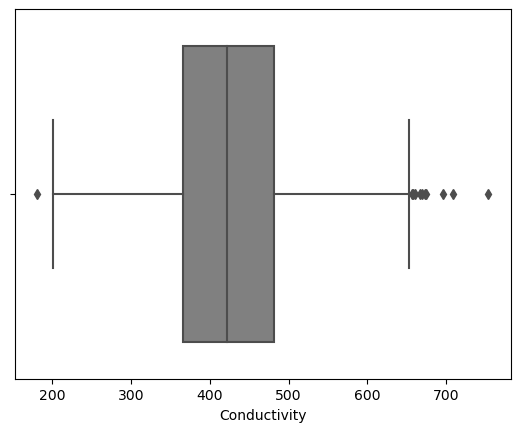

In [51]:
sns.boxplot(x = df1["Conductivity"], color = "gray")

In [52]:
df.head(2)

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.05786     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0

Conductivity: Appears to have a symmetric distribution with very few outliers.

## Organic_carbon

In [53]:
df["Organic_carbon"].isnull().sum()

63

<Axes: xlabel='Organic_carbon', ylabel='Count'>

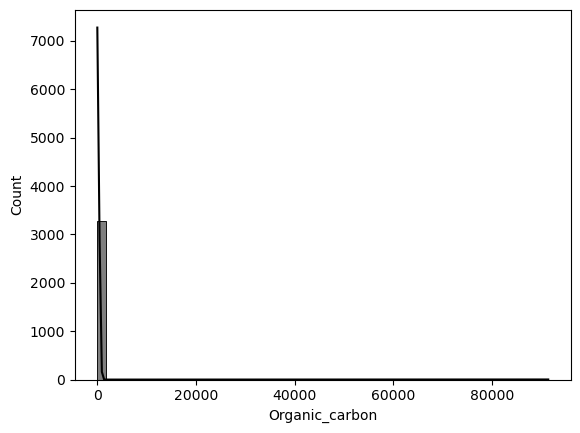

In [54]:
sns.histplot(df1["Organic_carbon"], color = "black", bins = 50, kde = True)

<Axes: xlabel='Organic_carbon'>

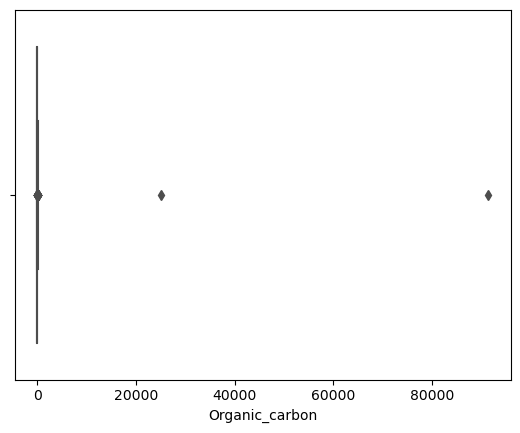

In [55]:
sns.boxplot(x = df1["Organic_carbon"], color = "gray")

Organic Carbon: Like Chloramines, the box is not visible, which could mean extreme values are affecting the scale.

## Trihalomethanes

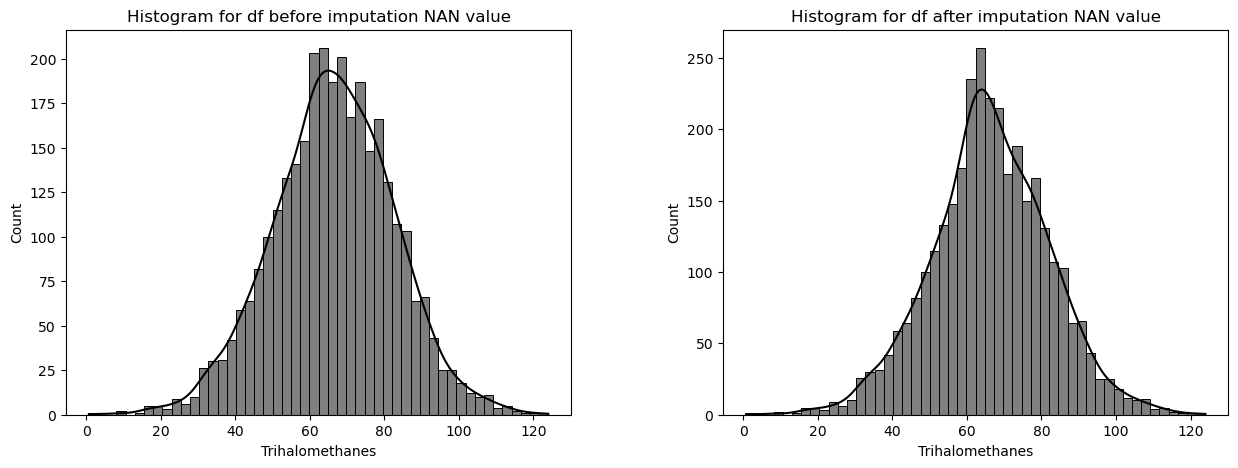

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.histplot(df['Trihalomethanes'], bins=50, kde=True, color='black', ax=axes[0])
axes[0].set_title('Histogram for df before imputation NAN value')

# Plot for df2
sns.histplot(df1['Trihalomethanes'], bins=50, kde=True, color='black', ax=axes[1])
axes[1].set_title('Histogram for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

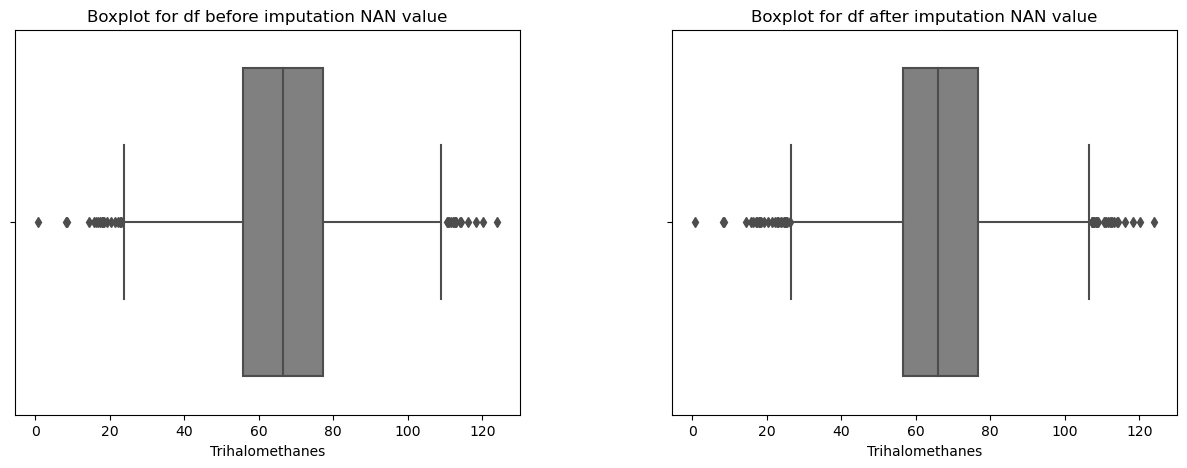

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for df1
sns.boxplot(x = df["Trihalomethanes"], color = "gray", ax = axes[0])
axes[0].set_title('Boxplot for df before imputation NAN value')

# Plot for df2
sns.boxplot(x = df1["Trihalomethanes"], color = "gray", ax = axes[1])
axes[1].set_title('Boxplot for df after imputation NAN value')

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value of wspace as needed

plt.show()

In [58]:
df["Trihalomethanes"].isnull().sum()

163

Trihalomethanes: A symmetric distribution with outliers is observed.

## Turbidity

In [59]:
df["Turbidity"].isnull().sum()

2

<Axes: xlabel='Turbidity', ylabel='Count'>

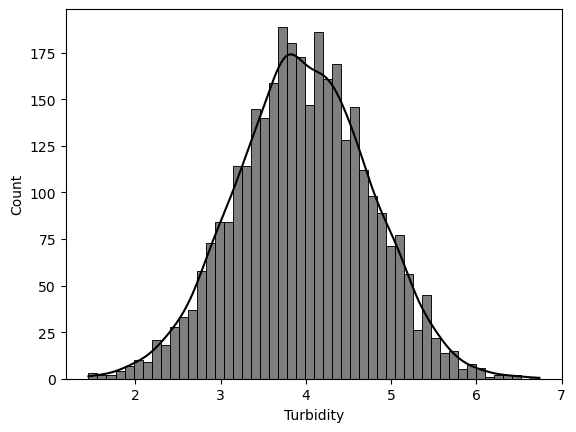

In [60]:
sns.histplot(df1["Turbidity"], color = "black", kde = True, bins = 50)

<Axes: xlabel='Turbidity'>

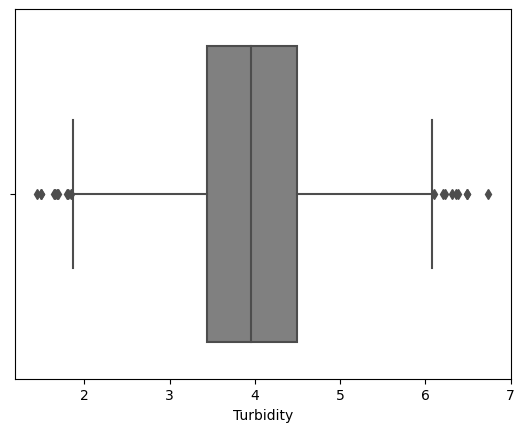

In [61]:
sns.boxplot(x = df1["Turbidity"], color = "gray")

Turbidity: Displays a distribution close to normal with a small number of outliers.

In [62]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [63]:
df1['Chloramines'] = np.log1p(df1['Chloramines'])

In [64]:
df1['Organic_carbon'] = np.log1p(df1['Organic_carbon'])

In [65]:
df1 = df1.dropna()

In [66]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Multivarient Analysis

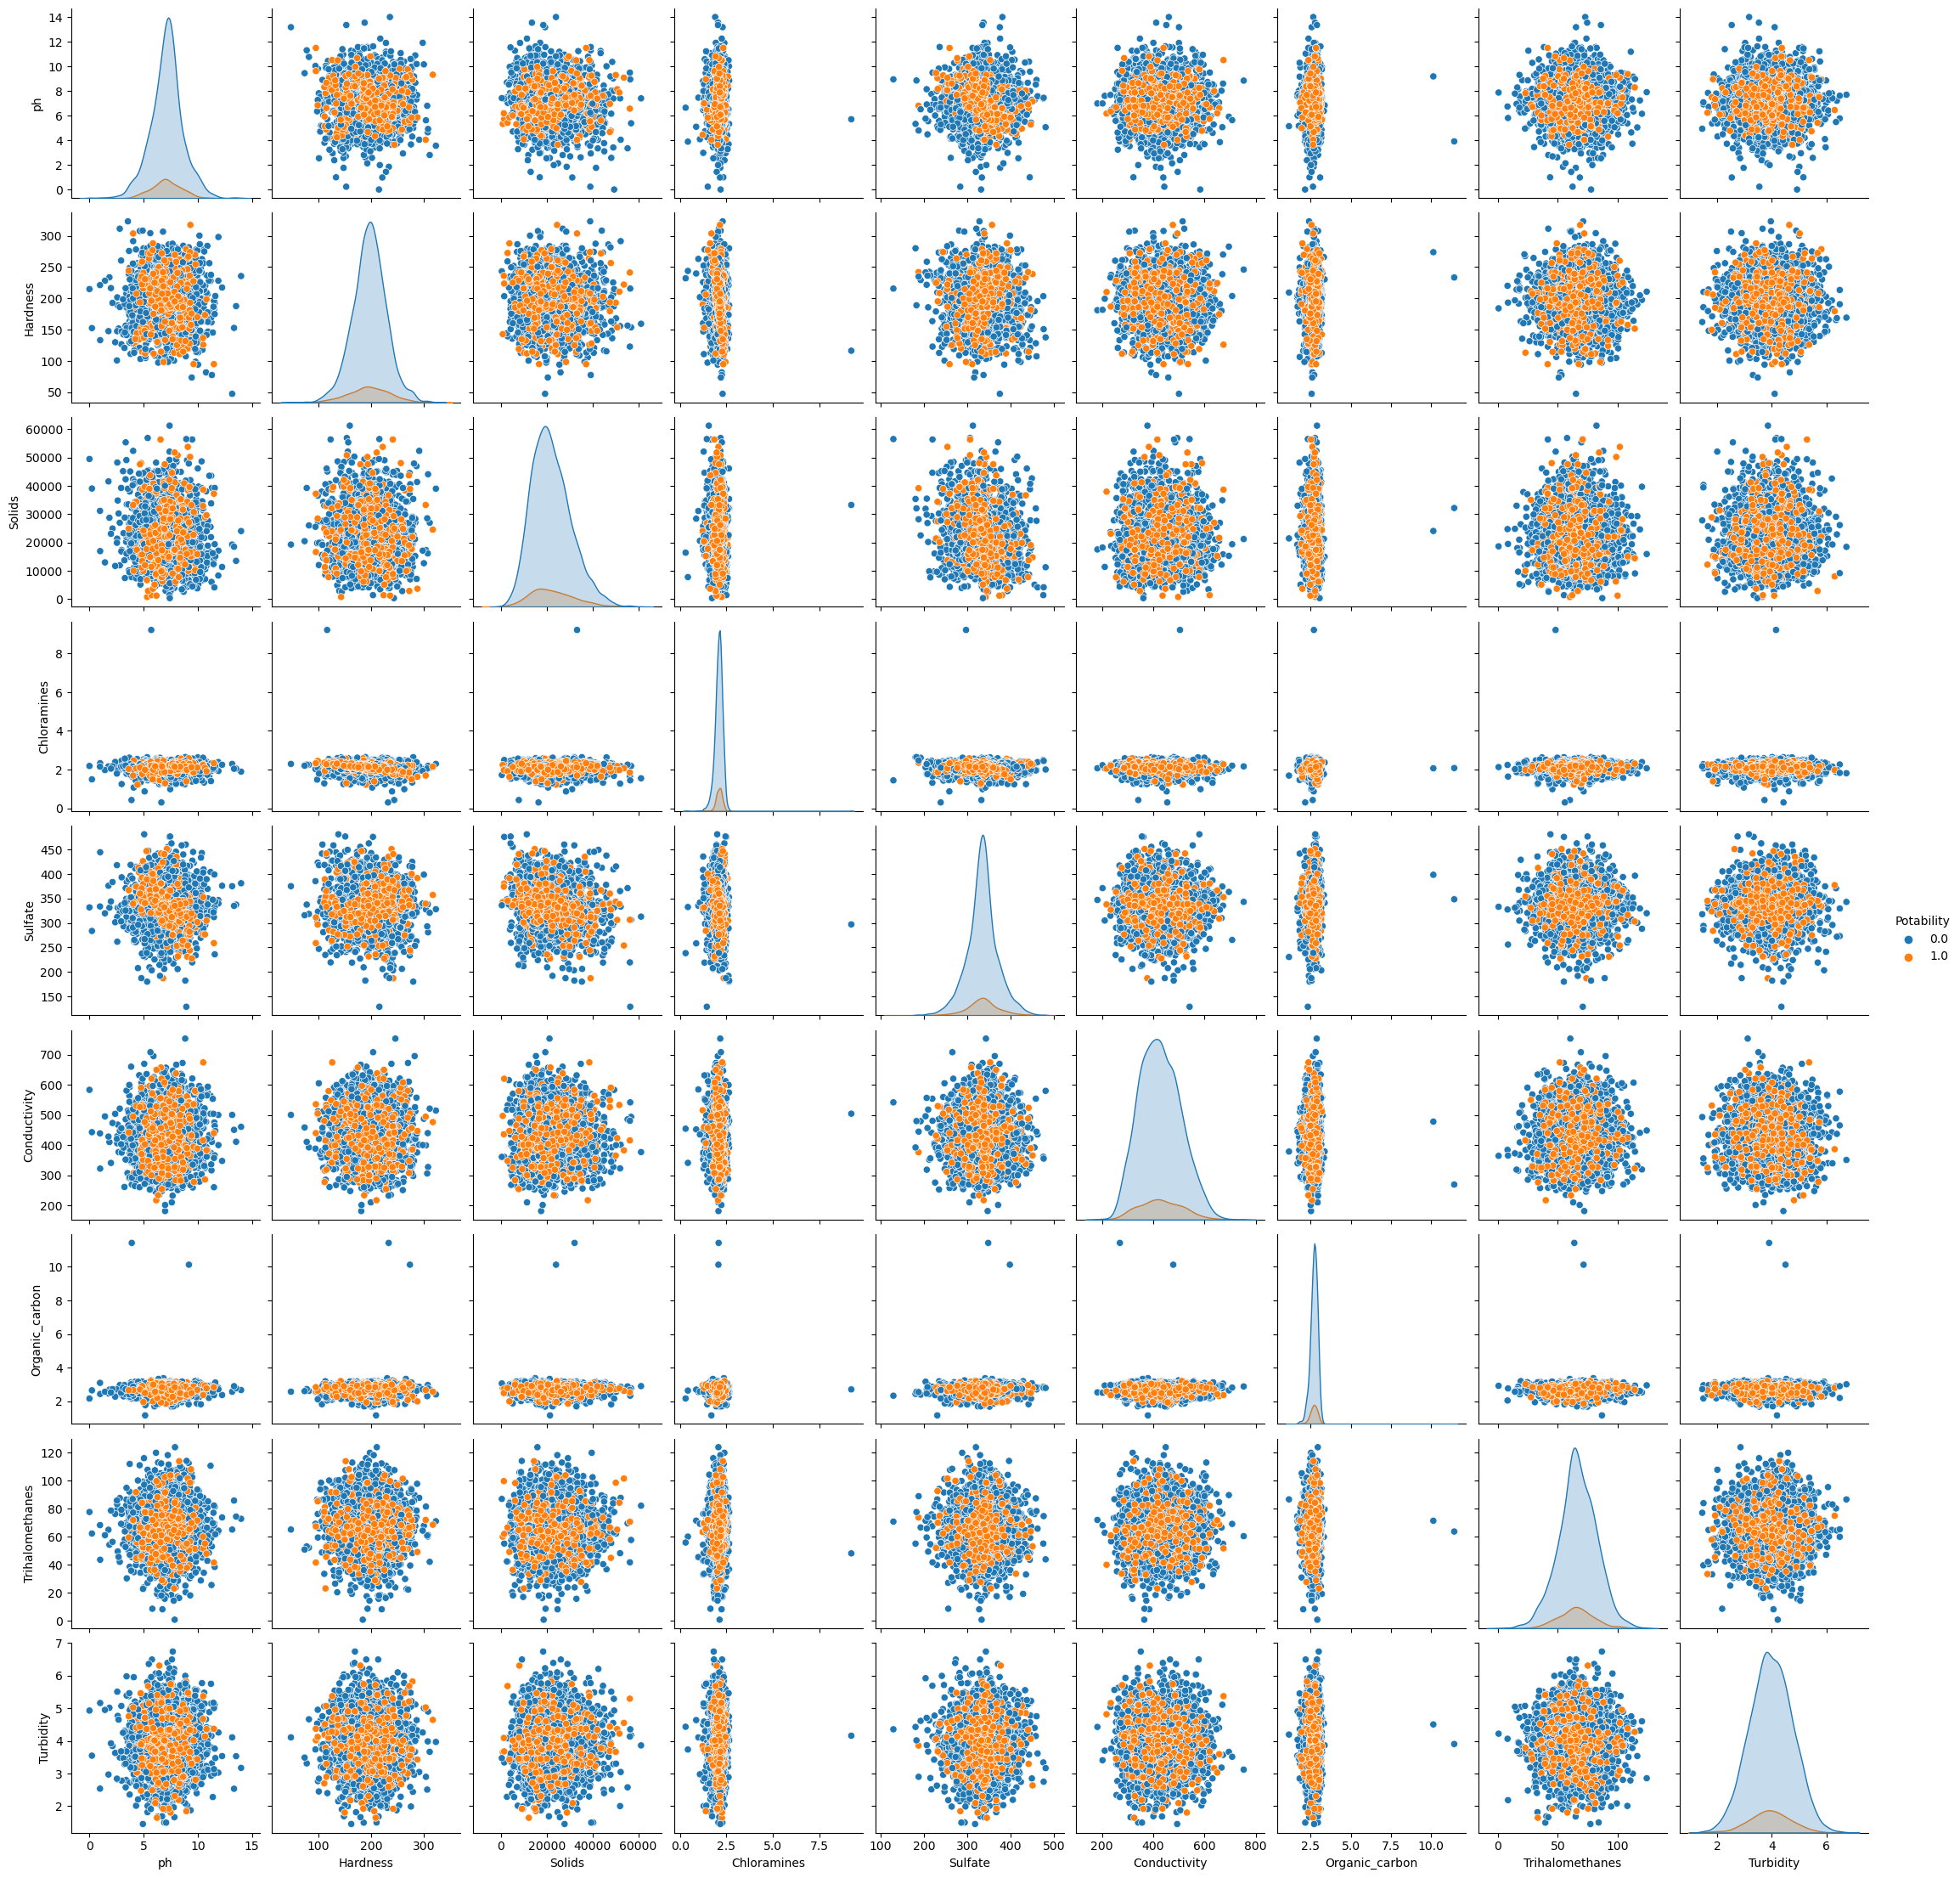

In [67]:
#Pairplot
sns.pairplot(df1, hue='Potability', diag_kind='kde')
plt.show()

From above charts we can confirm

1) There seems to be very less correlation between all the features.

2) 'Hardness', 'Solids',  'Sulfate', 'Conductivity', 'Trihalomethanes', 'Turbidity' columns are skewed. So, lets correct it

3) 'Chloramines' and 'Organic_carbon' shows extreamly skewd data and the outliers.

In [68]:
correlation_matrix = df1.corr()
correlation_matrix

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.080887 -0.087587    -0.031172  0.029242   
Hardness         0.080887  1.000000 -0.047381    -0.048610 -0.087298   
Solids          -0.087587 -0.047381  1.000000    -0.049179 -0.169960   
Chloramines     -0.031172 -0.048610 -0.049179     1.000000  0.024869   
Sulfate          0.029242 -0.087298 -0.169960     0.024869  1.000000   
Conductivity     0.001924 -0.023362  0.012851    -0.013547 -0.011492   
Organic_carbon   0.022611  0.029228  0.020016    -0.003459  0.040439   
Trihalomethanes -0.000890 -0.011425 -0.010124     0.006065 -0.026503   
Turbidity       -0.035890 -0.013420  0.019886     0.005631 -0.011253   
Potability      -0.002854 -0.007270  0.021835     0.026353  0.015877   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.001924        0.022611        -0.000890  -0.035890   
Hardness            -0.023362        0.029228        -0.011425  -0.013420   
Solids               0.012851        0.020016        -0.010124   0.019886   
Chloramines         -0.013547       -0.003459         0.006065   0.005631   
Sulfate             -0.011492        0.040439        -0.026503  -0.011253   
Conductivity         1.000000        0.003621        -0.000523   0.005710   
Organic_carbon       0.003621        1.000000        -0.010880  -0.012558   
Trihalomethanes     -0.000523       -0.010880         1.000000  -0.023409   
Turbidity            0.005710       -0.012558        -0.023409   1.000000   
Potability           0.014218       -0.017376        -0.018953  -0.016497   

                 Potability  
ph                -0.002854  
Hardness          -0.007270  
Solids             0.021835  
Chloramines        0.026353  
Sulfate            0.015877  
Conductivity       0.014218  
Organic_carbon    -0.017376  
Trihalomethanes   -0.018953  
Turbidity         -0.016497  
Potability         1.000000

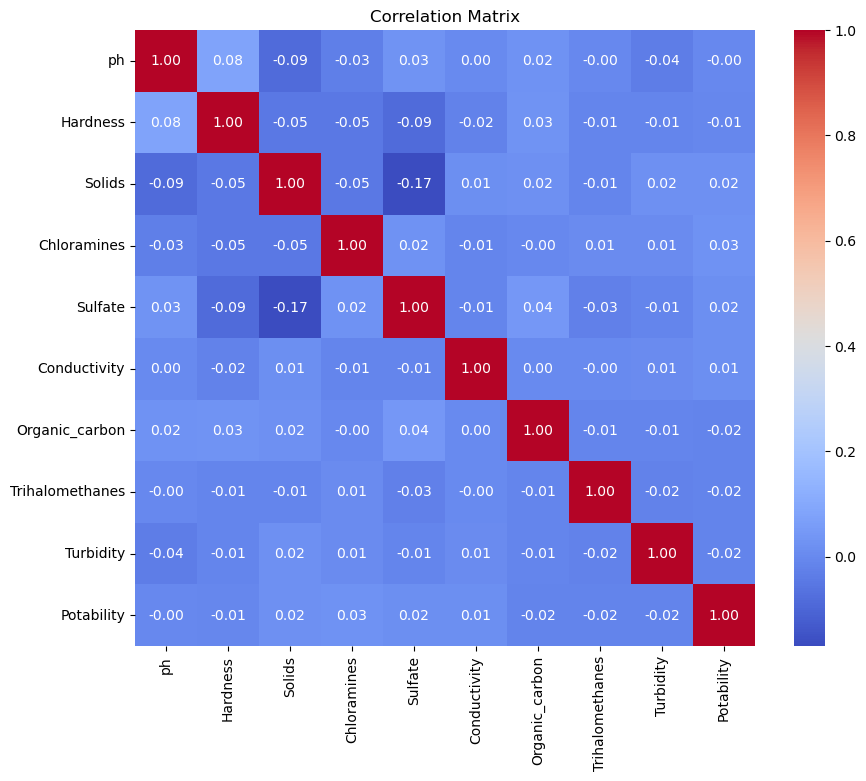

In [69]:

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


* The data shows very less correlation between all the features.
* Certain column seems to be skewed, let's correct the skewed columns.

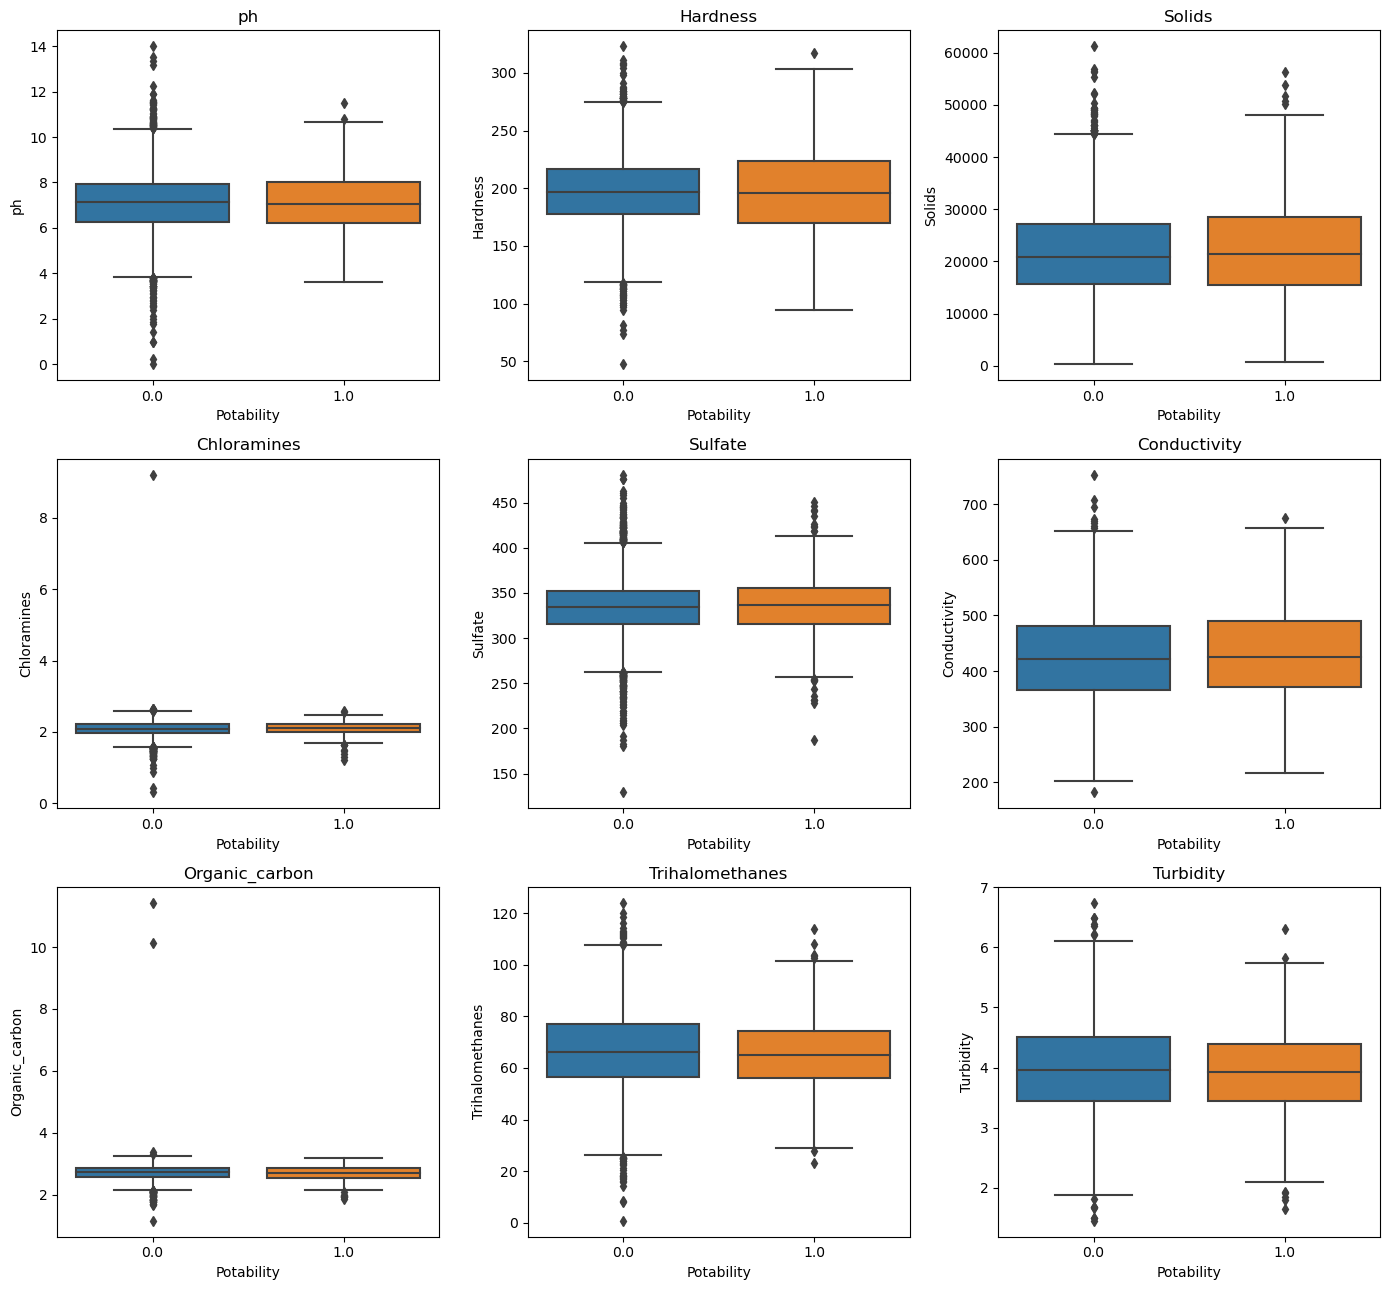

In [70]:
# Boxplot for each variable with respect to Potability
plt.figure(figsize=(14, 13))
for i, column in enumerate(df1.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Potability', y=column, data=df1)
    plt.title(column)
plt.tight_layout()
plt.show()

In [71]:
l

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [72]:
from scipy.stats import skew   

In [73]:
for variable in l:
    skewness = skew(df1[variable])
    print(f"The {variable} skewness {skewness}")
    
    print("------------------------------")

The ph skewness -0.04340588626692992
------------------------------
The Hardness skewness -0.037818962433449184
------------------------------
The Solids skewness 0.6222456879880462
------------------------------
The Chloramines skewness 7.024803177420686
------------------------------
The Sulfate skewness -0.07606941445314655
------------------------------
The Conductivity skewness 0.2645017665164974
------------------------------
The Organic_carbon skewness 11.29065231422677
------------------------------
The Trihalomethanes skewness -0.05856662621275542
------------------------------
The Turbidity skewness -0.009115535362712384
------------------------------


1) Highly positively skewed variables Chloramines and Organic_carbon.

2) Negatively skewed variables pH, Hardness, Sulfate and Trihalomethanes.

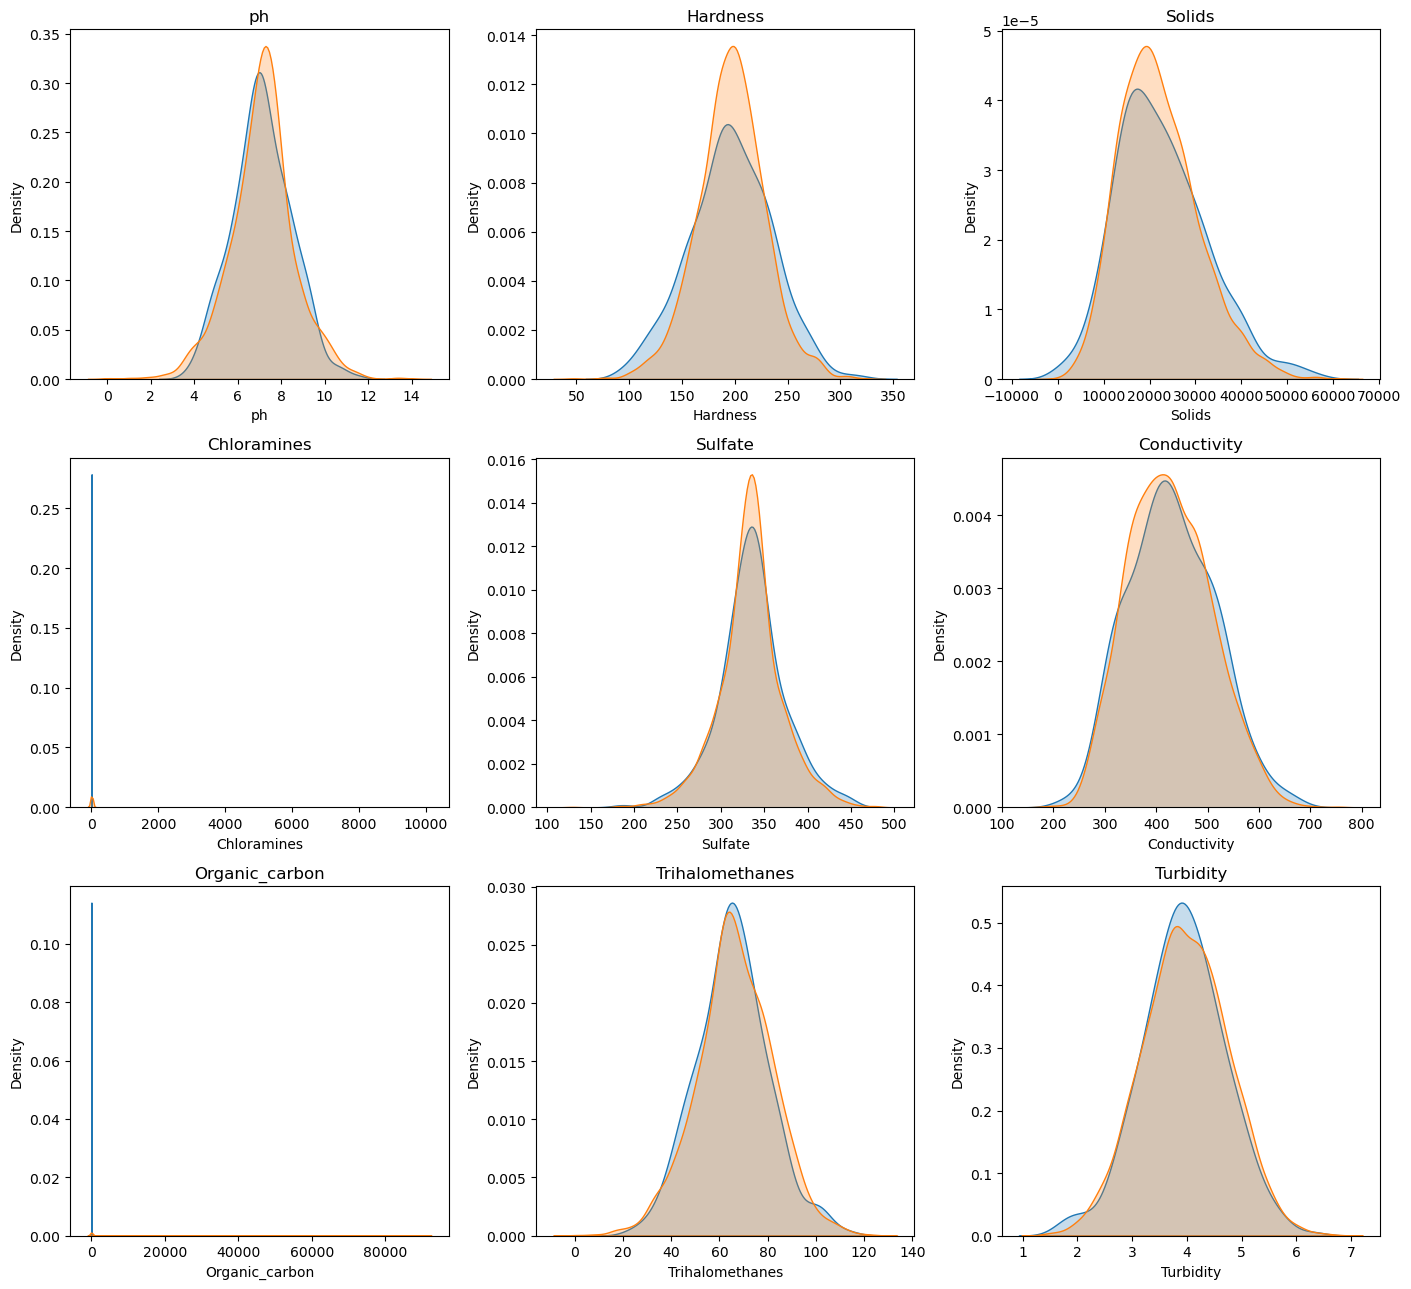

In [74]:
plt.figure(figsize=(14, 13))
for i, column in enumerate(df1.columns[:-1]):
    plt.subplot(3, 3, i + 1)  # Assuming there are 9 columns, adjust accordingly
    sns.kdeplot(potable[column], label='Class 0', shade=True)
    sns.kdeplot(not_potable[column], label='Class 1', shade=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [75]:
df["'Chloramines'"] = df1['Chloramines']
df['Organic_carbon'] = df1['Organic_carbon']

## outlier treatment

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

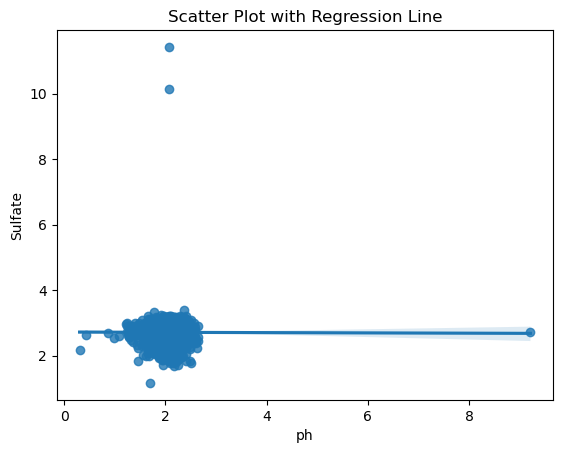

In [77]:
# Plot for df1
sns.regplot(x='Chloramines', y='Organic_carbon', data=df1)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('ph')
plt.ylabel('Sulfate')
plt.show()

The data exhibited extreme outliers in Chloramines and Organic Carbon

In [78]:
# Columns with potential outliers
columns_with_outliers = ['Chloramines','Organic_carbon']

# Function to handle outliers using IQR method with capping
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))

# Loop through columns and handle outliers
for column in columns_with_outliers:
    handle_outliers(df1, column)
# Outliers are replaced with Capping method.

The data exhibited extreme outliers in Chloramines and Organic Carbon. To address this, we applied the IQR (Interquartile Range) Capping method.

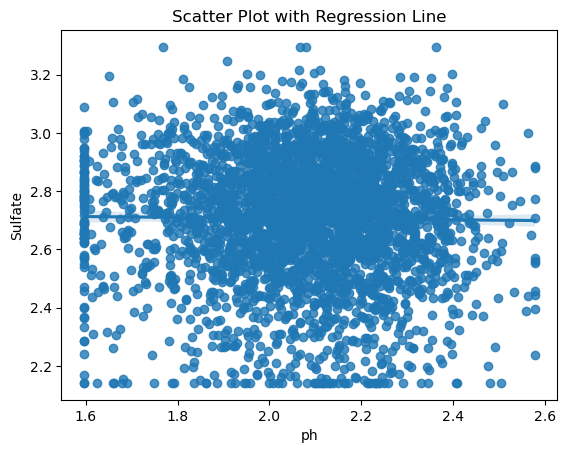

In [79]:
# Plot for df1
sns.regplot(x='Chloramines', y='Organic_carbon', data=df1)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('ph')
plt.ylabel('Sulfate')
plt.show()

For Chloramines and Organic Carbon, the lack of visible boxes on the plot points to the necessity of investigating the data further to understand the extreme values and consider appropriate data preprocessing methods to correct for these extremes. The outliers in the other features need to be evaluated to determine if they represent true anomalies or natural variations within the data.

#### IQR Capping:
Extremes values (outliers) in Chloramines and Organic Carbon were capped using the IQR method, ensuring a more robust and representative dataset.

#### Scatterplots :
Post IQR Capping, a thorough examination of the scatterplot reveals a notable absence of outliers in Chloramines and Organic Carbon.

#### Confirmation:
Compare the scatterplot before and after IQR Capping, showcasing the successful removal of extreme outliers.

In [80]:
columns = ['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

binning_transformer = ColumnTransformer(
    transformers=[
        ('binning', KBinsDiscretizer(n_bins= 15, encode='ordinal', strategy='quantile'), columns)
    ],
    remainder='passthrough'  # Pass through columns not specified for binning
)

# pipeline with the column transformer
pipeline = Pipeline([
    ('binning', binning_transformer)
])

# Fit and transform the data
transformed_data = pipeline.fit_transform(df1)

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=columns + ['Potability'])

# Display the transformed DataFrame
transformed_df.head()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  \
0   9.0       9.0     7.0          8.0     12.0          14.0             1.0   
1   0.0       0.0     5.0          5.0      6.0          14.0             9.0   
2  11.0      12.0     6.0         13.0      5.0           7.0            11.0   
3  12.0      10.0     8.0         11.0     11.0           3.0            13.0   
4  13.0       4.0     5.0          5.0      3.0           5.0             2.0   

   Trihalomethanes  Turbidity  Potability  
0             13.0        1.0         0.0  
1              3.0       11.0         0.0  
2              7.0        1.0         0.0  
3             14.0       12.0         0.0  
4              0.0        8.0         0.0

#### Handling Skewed Distributions:
Quantile binning is particularly useful for handling skewed distributions. By dividing the data into bins based on quantiles, you ensure that each bin contains an approximately equal number of observations, allowing for a more balanced representation across different parts of the distribution.

#### Improved Model Performance:
Some machine learning algorithms, especially those sensitive to the scale of features, may benefit from binned data. Binned features can help improve model stability and prevent issues related to the scale of continuous variables.

#### Robustness to Outliers:
Quantile binning reduces the impact of outliers because it focuses on the relative position of data points within each bin rather than their absolute values. Extreme values are less likely to disproportionately affect a single bin.

In [81]:
transformed_df.columns[:-1]

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

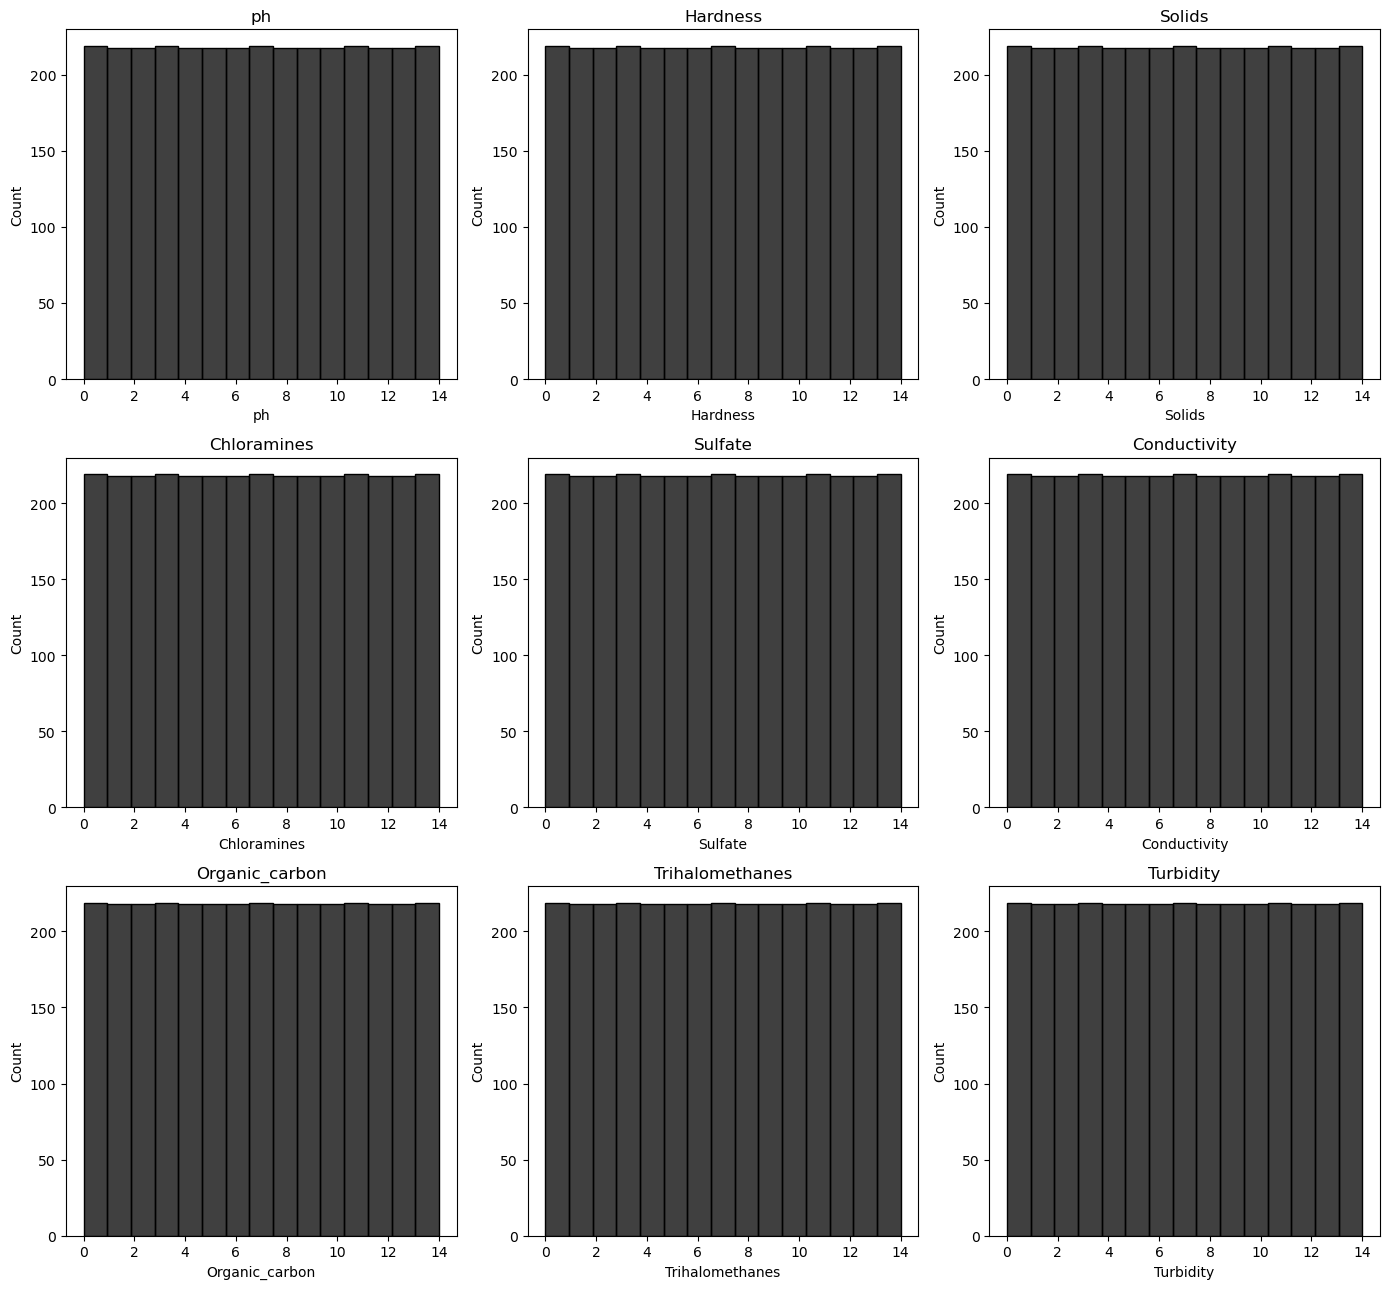

In [82]:
plt.figure(figsize=(14, 13))
for i, column in enumerate(transformed_df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(transformed_df[column], bins=15, color='black')
    plt.title(column)
plt.tight_layout()
plt.show()

By using the quantile strategy for data binning, the resulting bar graph will represent the distribution of data based on quantile intervals. Each bar corresponds to a quantile bin, and the height of the bar indicates the frequency or count of data points falling within that quantile.

#### X-axis:

The x-axis represents the quantile bins created through the quantile strategy. These bins are typically labeled as percentiles (e.g., 25%, 50%, 75%) or specific quantile ranges.

#### Y-axis:

The y-axis represents the count of data points within each quantile bin. The height of each bar reflects how many observations fall into that specific quantile.

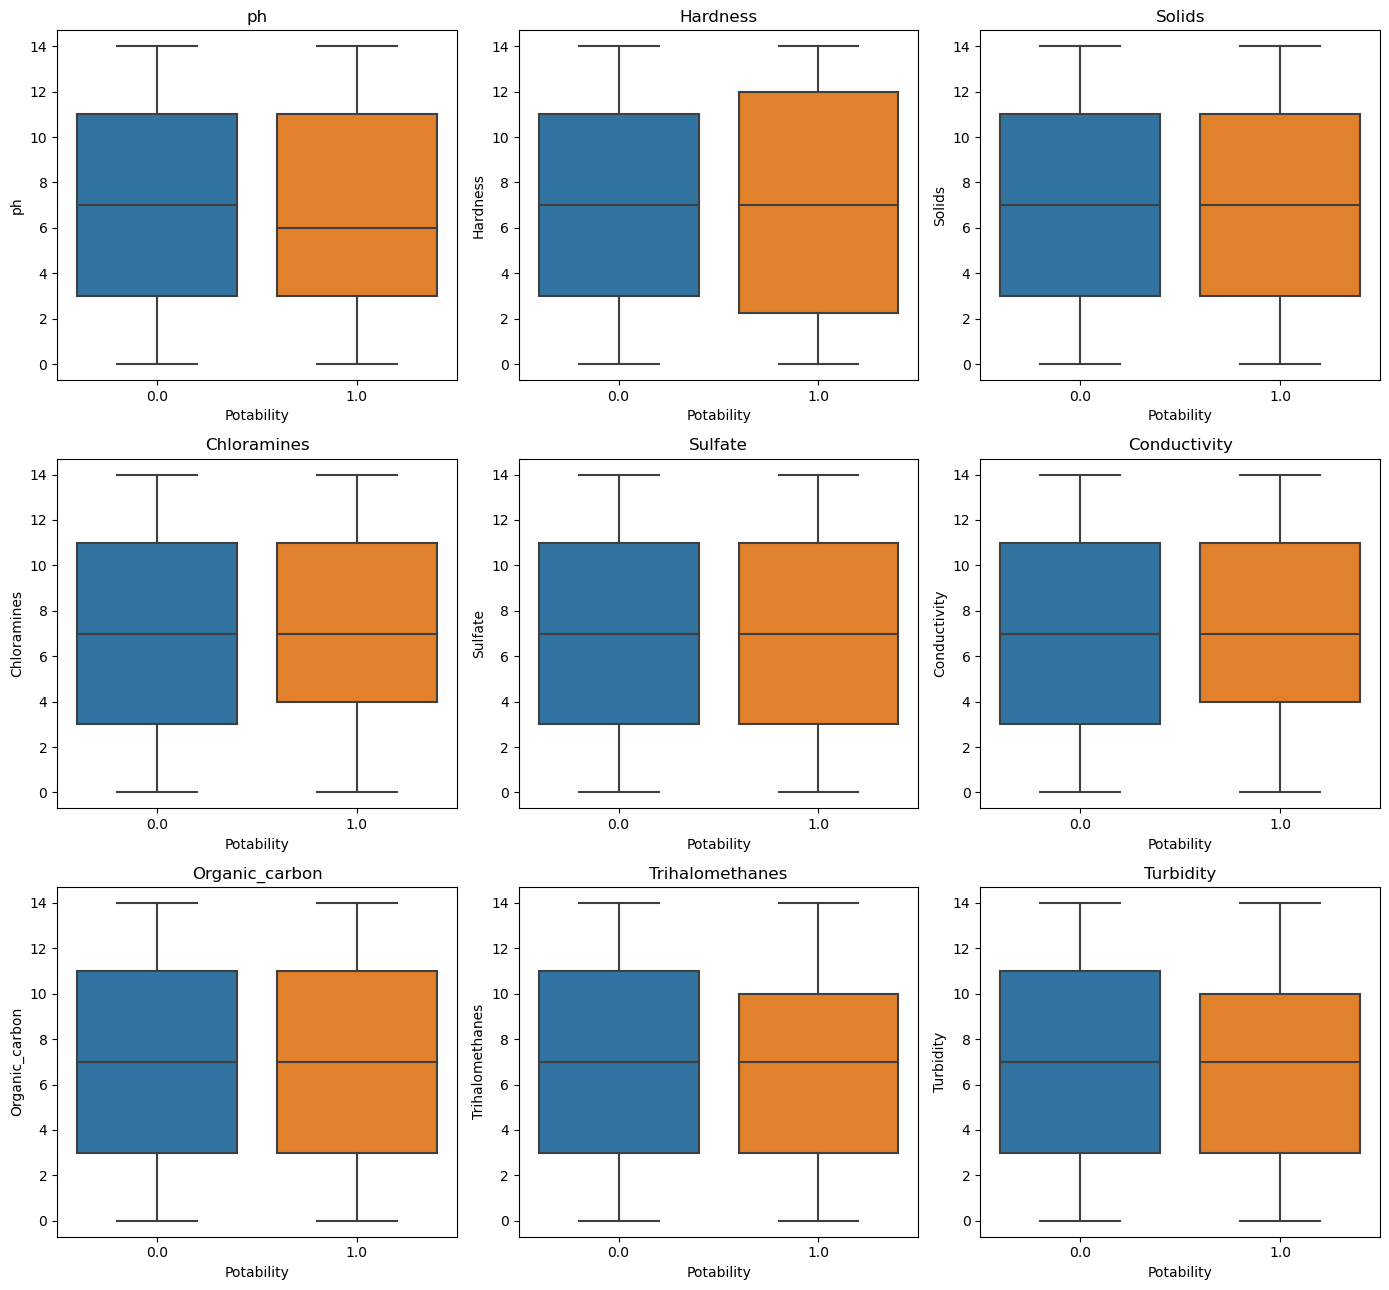

In [83]:
plt.figure(figsize=(14, 13))
for i, column in enumerate(transformed_df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Potability', y=column, data=transformed_df)
    plt.title(column)
plt.tight_layout()
plt.show()

#### In the box plot analysis, we can clearly observe the absence of outliers after implementing data binning

## Pie Chart

In [84]:
fig =  px.pie (df1, names = "Potability", hole = 0.4)
fig.show ()

#### A dataset is considered imbalanced when the distribution of the target classes is significantly skewed towards one class.

1) In our case, with 10.3% potable and 89.7% not potable, the dataset is imbalanced because the distribution is heavily skewed towards the "not potable" class.

2) Undersampling: Reduce the size of the majority class (not potable) by randomly removing samples. This helps balance the class distribution.
    
3) Oversampling: Increase the size of the minority class (potable) by replicating samples or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be useful.

In [85]:
transformed_df.shape

(3275, 10)

In [86]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [87]:
X = transformed_df.drop("Potability", axis = 1)
y = transformed_df["Potability"]

In [88]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

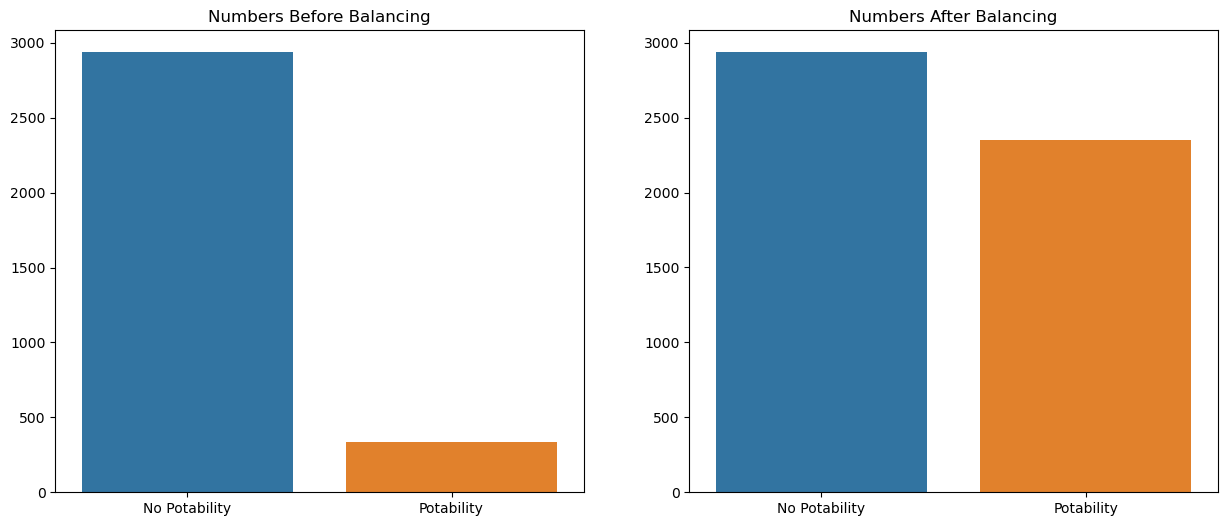

In [89]:
labels = ["No Potability","Potability"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

1) By using SMOTE algorithms generate synthetic samples for the minority class. 

2) This helps improve the representation of the minority class.

3) As we can see in the above bar graph, by implementing SMOT try to improve the minority class now data looking out significantly balenced.

## Model_building

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [91]:
X.head()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  \
0   9.0       9.0     7.0          8.0     12.0          14.0             1.0   
1   0.0       0.0     5.0          5.0      6.0          14.0             9.0   
2  11.0      12.0     6.0         13.0      5.0           7.0            11.0   
3  12.0      10.0     8.0         11.0     11.0           3.0            13.0   
4  13.0       4.0     5.0          5.0      3.0           5.0             2.0   

   Trihalomethanes  Turbidity  
0             13.0        1.0  
1              3.0       11.0  
2              7.0        1.0  
3             14.0       12.0  
4              0.0        8.0

In [92]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42 )

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

In [95]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your features and target variable
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_train, y_train)

# Create a DataFrame to display ranking
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking')

# Display the top N features
top_n = 10  # Change this to the desired number
print(ranking_df.head(top_n))

           Feature  Ranking
3      Chloramines        1
1         Hardness        2
8        Turbidity        3
0               ph        4
4          Sulfate        5
7  Trihalomethanes        6
5     Conductivity        7
6   Organic_carbon        8
2           Solids        9


## Logistic Regression

In [96]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.5345316934720908
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.85      0.67       594
         1.0       0.40      0.13      0.19       463

    accuracy                           0.53      1057
   macro avg       0.48      0.49      0.43      1057
weighted avg       0.49      0.53      0.46      1057



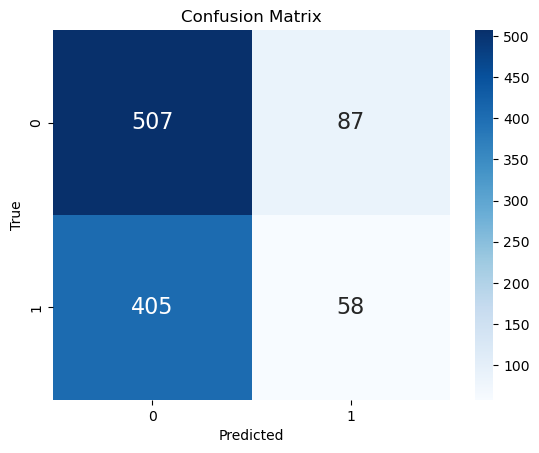

In [97]:
y_pred = logreg_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

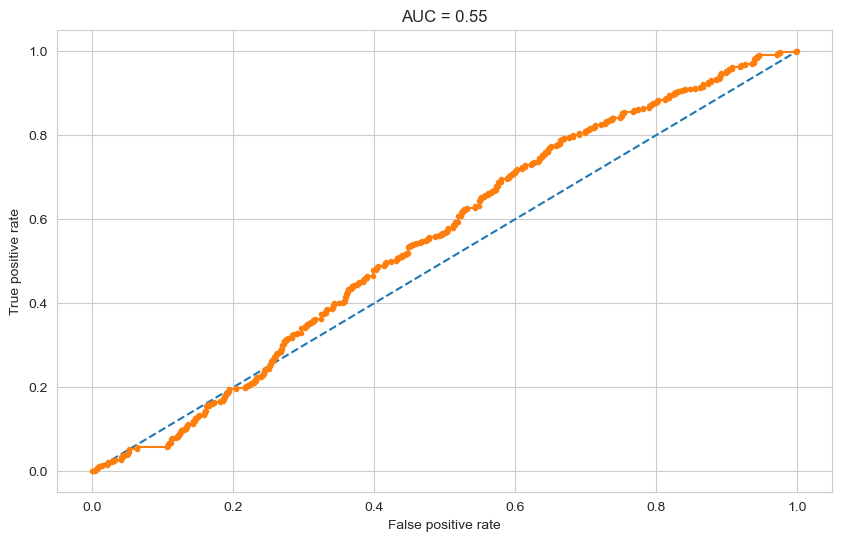

In [98]:
# ROC curve and AUC
probs = logreg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

## Decision Tree Classifier

In [99]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))



Decision Tree Accuracy: 0.8666035950804163
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       594
         1.0       0.85      0.85      0.85       463

    accuracy                           0.87      1057
   macro avg       0.86      0.86      0.86      1057
weighted avg       0.87      0.87      0.87      1057



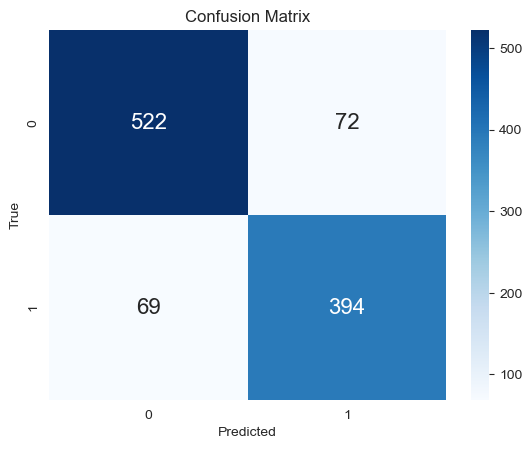

In [100]:
y_pred = dt_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

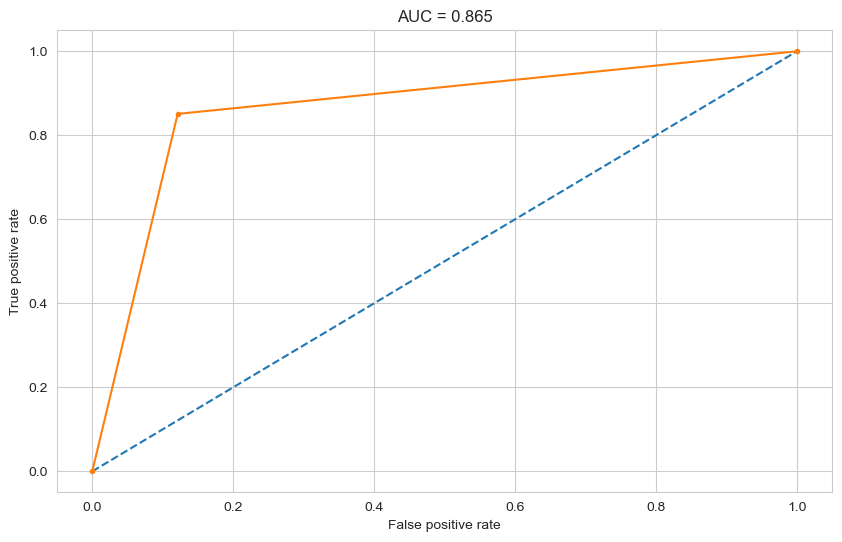

In [101]:
# ROC curve and AUC
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

## Random Forest Classifier

In [102]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9441816461684012
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       594
         1.0       0.98      0.89      0.93       463

    accuracy                           0.94      1057
   macro avg       0.95      0.94      0.94      1057
weighted avg       0.95      0.94      0.94      1057



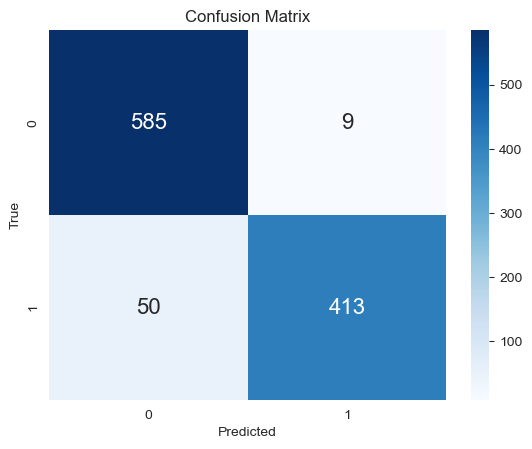

In [103]:
y_pred = rf_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

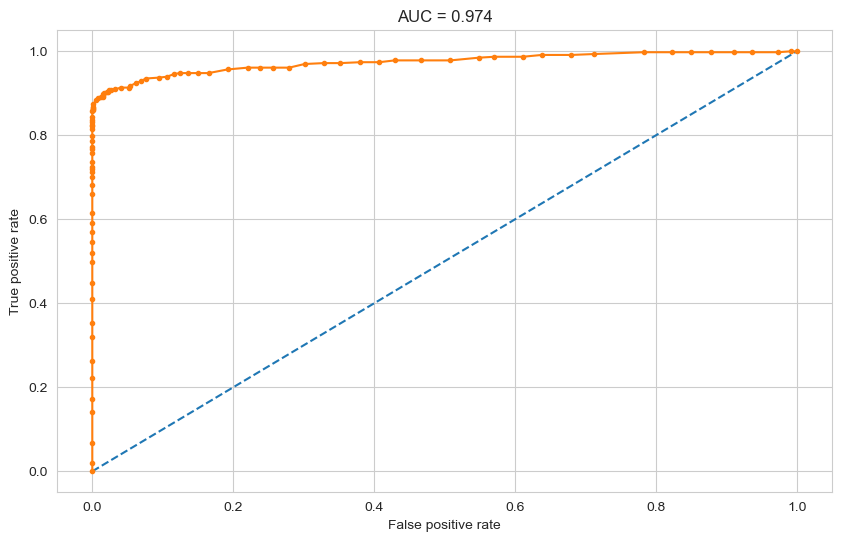

In [104]:
# ROC curve and AUC
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

## Support Vector Machines

In [105]:
 svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7975402081362346
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       594
         1.0       0.75      0.82      0.78       463

    accuracy                           0.80      1057
   macro avg       0.80      0.80      0.80      1057
weighted avg       0.80      0.80      0.80      1057



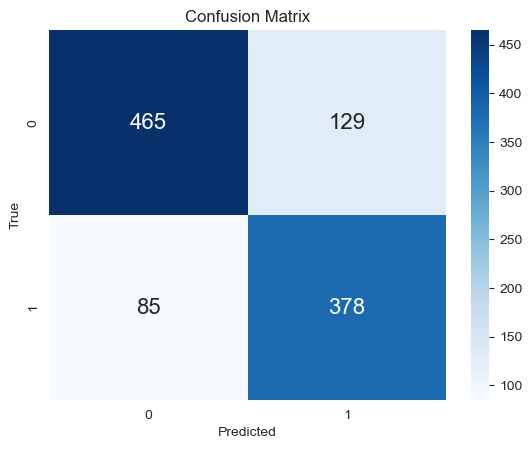

In [106]:
y_pred = svm_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbors (KNN)

In [107]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.8410596026490066
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84       594
         1.0       0.73      1.00      0.85       463

    accuracy                           0.84      1057
   macro avg       0.87      0.86      0.84      1057
weighted avg       0.88      0.84      0.84      1057



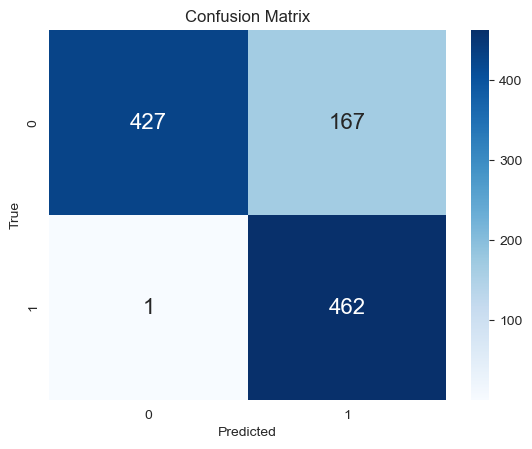

In [108]:
y_pred = knn_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

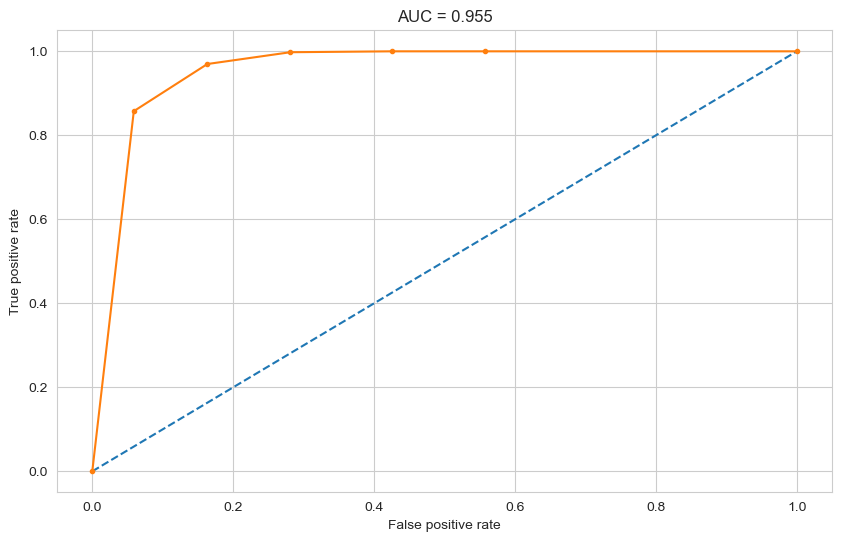

In [109]:
# ROC curve and AUC
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

## Naive Bayes

In [110]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.5619678334910123
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67       594
         1.0       0.50      0.28      0.36       463

    accuracy                           0.56      1057
   macro avg       0.54      0.53      0.51      1057
weighted avg       0.55      0.56      0.53      1057



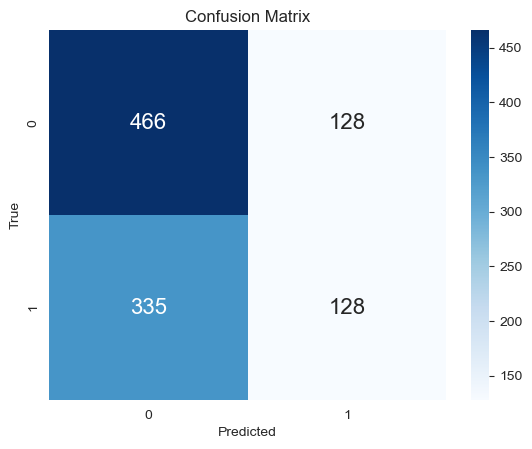

In [111]:
y_pred = nb_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

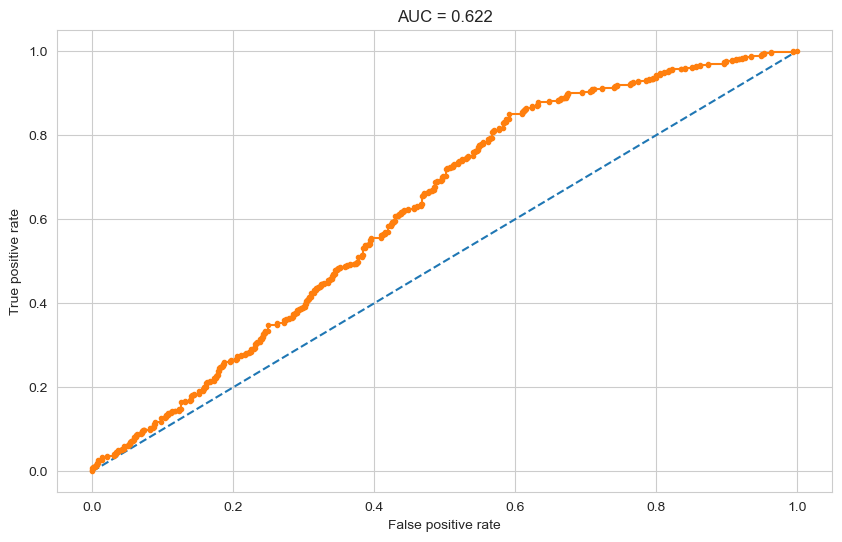

In [112]:
# ROC curve and AUC
probs = nb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

## Gradient Boosting (XGBoost)

In [113]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.9394512771996215
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       594
         1.0       0.98      0.88      0.93       463

    accuracy                           0.94      1057
   macro avg       0.95      0.93      0.94      1057
weighted avg       0.94      0.94      0.94      1057



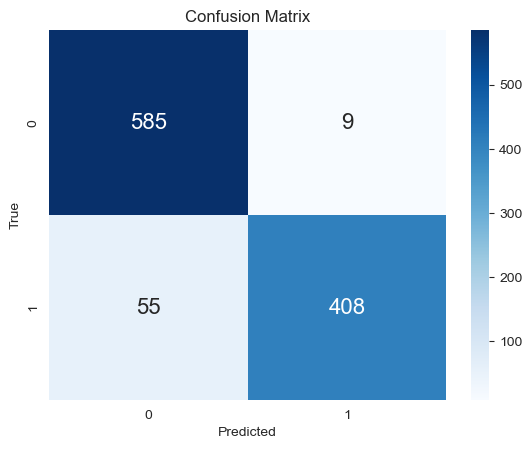

In [114]:
y_pred =xgb_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

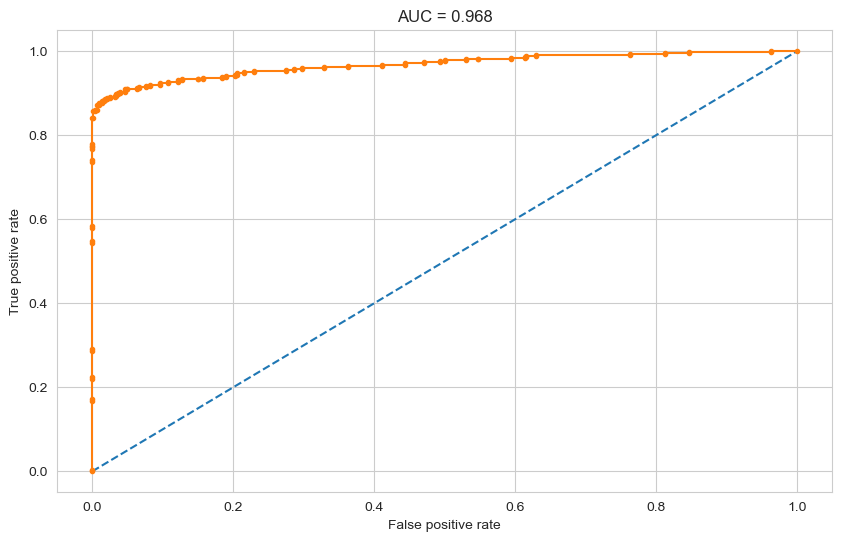

In [115]:
# ROC curve and AUC
probs = xgb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

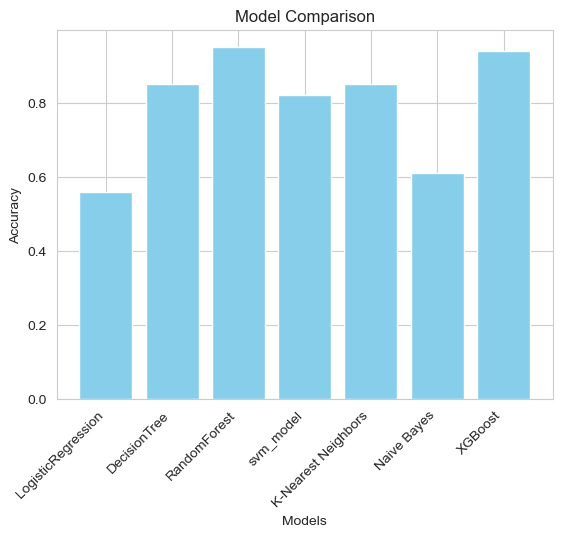

In [116]:
def model_comparison_plot(model_names, metric_values, metric_name):
    
    fig, ax = plt.subplots()

    ax.bar(model_names, metric_values, color='skyblue')
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_name)
    ax.set_title('Model Comparison')

    # Display the plot
    plt.show()

# Example data
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest','svm_model', 'K-Nearest Neighbors', 'Naive Bayes', 'XGBoost']
accuracy_values = [0.56, 0.85, 0.95, 0.82, 0.85, 0.61, 0.94]

# Create the comparison plot
model_comparison_plot(model_names, accuracy_values, 'Accuracy')

In [1]:
l = [0,1,2,3]
for l[-1] in l:
    print(l[-1])

0
1
2
2


In [2]:
a = 12345

In [13]:
a = 12345
l1 = a%10
sec_num = a//10
l2 = sec_num%10
third_num = sec_num//10
l3 = third_num%10
forth_num = third_num//10
l4 = forth_num%10

l5 = forth_num//10

rev = l1*10000+l2*1000+l3*100*+l4*10+l5
print(l1,l2,l3,l4,l5)
rev

5 4 3 2 1


60001

In [14]:
a = 1234
a = a%10
sec_num = a//10
b = sec_num%10
third_num = sec_num//10
c = third_num%10
forth_num = third_num//10
d = forth_num%10





rev=a*1000+b*100+c*10+d

In [15]:
rev

4000

In [18]:
x=int(input("enter the four digit number "))
a=x%10 # to get last number
num_1=x//10 # to get first three numbers
b=num_1%10 # this way i will get 2nd last number
num_2=num_1//10 # here will get first two digit number
c=num_2%10 # we will get 2 nd number
d=num_2//10 # here we will get 1st digit
#formula for reverse
rev=a*1000+b*100+c*10+d
print(rev)
#now let check whether both number are equal or not
if x==rev:
    print(True)
else:
    print(False)


enter the four digit number 5678
8765
False


In [20]:
b

7

In [21]:
a = 12345
l1 = a%10
sec_num = a//10
l2 = sec_num%10
third_num = sec_num//10
l3 = third_num%10
forth_num = third_num//10
l4 = forth_num%10

l5 = forth_num//10

rev = l1*10000+l2*1000+l3*100+l4*10+l5
print(l1,l2,l3,l4,l5)
rev

5 4 3 2 1


54321